<a href="https://colab.research.google.com/github/amitnits2016/fastai/blob/master/5_VehicleClassClassification/5_VehicleClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import *
from fastai.imports import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
path= Path('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes')

In [4]:
path.ls()

[PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/labels.csv'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/test_actual_labels.csv'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/test'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/train')]

In [5]:
df = pd.read_csv(path/'labels.csv')
df.head()

,image_name,tags
0,001133_05.jpg,Bicycle
1,001150_01.jpg,Bicycle
2,001150_09.jpg,Bicycle
3,001153_05.jpg,Bicycle
4,001156_02.jpg,Bicycle


In [6]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4, p_affine=1., p_lighting=1.)

In [7]:
data=ImageDataBunch.from_csv(path, folder='train', test='test',csv_labels='labels.csv',valid_pct=0.2, size=224, seed=1, bs=64
                             ).normalize(imagenet_stats)

In [8]:
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes

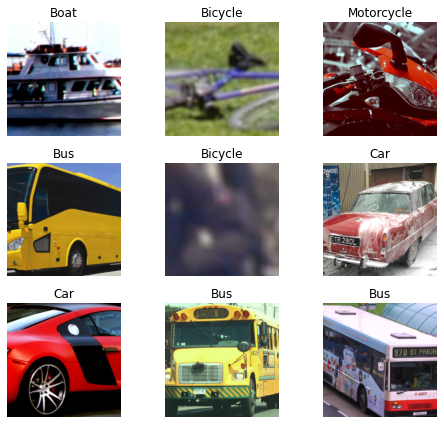

In [9]:
data.show_batch(rows=3, figsize=(7, 6))

In [10]:
print(data.classes)

['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle']
